# Titanic Survival Prediction
This project aims to build a machine learning model that predicts the survival of passengers on the Titanic. The dataset used for this project is the famous Titanic dataset, which contains information about the passengers such as their age, gender, ticket class, fare, and whether they survived or not. The goal is to analyze the given data, prepare it for training, and then design and train your own classifiers to predict the survival outcome for new, unseen data.

## Data Preparation

In [331]:
import pandas as pd

# Read the train.csv file.
df = pd.read_csv('train.csv')

# Print out the first 5 samples.
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [332]:
# Print out the count of missing values in each column.
print(df.isnull().sum())

# Impute missing entries with zero.
df.fillna(0, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [333]:
print(df.columns)

# Identify and write down which columns are numerical and which are categorical.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = numerical_columns.difference(['PassengerId', 'Pclass'])
categorical_columns = categorical_columns.union(['PassengerId', 'Pclass'])
print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

# Convert the categorical columns into one-hot encoded columns. Print out the first 5 samples to verify.
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
categorical_columns = categorical_columns.difference(['PassengerId', 'Name', 'Ticket'])

# Then the useful categorical columns are Cabin, Embarked, Pclass, Sex. Only need to convert these columns.
df = pd.get_dummies(df, columns=categorical_columns)
pd.set_option('display.max_columns', 10) 
print(df.shape)
print(df.head(n=5))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Numerical columns: Index(['Age', 'Fare', 'Parch', 'SibSp', 'Survived'], dtype='object')
Categorical columns: Index(['Cabin', 'Embarked', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket'], dtype='object')
(891, 162)
   Survived   Age  SibSp  Parch     Fare  ...  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male
0         0  22.0      1      0   7.2500  ...     False     False      True       False      True
1         1  38.0      1      0  71.2833  ...      True     False     False        True     False
2         1  26.0      0      0   7.9250  ...     False     False      True        True     False
3         1  35.0      1      0  53.1000  ...      True     False     False        True     False
4         0  35.0      0      0   8.0500  ...     False     False      True       False      True

[5 rows x 162 columns]


In [334]:
from sklearn.model_selection import train_test_split
# Divide the cleaned dataset into training features (X train), training targets (y train), testing features (X test), and test targets (y test).
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print out each set’s shape.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 161)
y_train shape: (712,)
X_test shape: (179, 161)
y_test shape: (179,)


In [335]:
# How many samples are there for survival and non-survival?
print("Survival count:", df.value_counts('Survived')[1])
print("Non-survival count:", df.value_counts('Survived')[0])

# Use oversampling technique to handle imbalanced classes.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Survival count: 342
Non-survival count: 549
X_train shape: (878, 161)
y_train shape: (878,)
X_test shape: (179, 161)
y_test shape: (179,)


## Model Training and Validation

Training accuracy: 0.8348519362186788
Testing accuracy: 0.7094972067039106


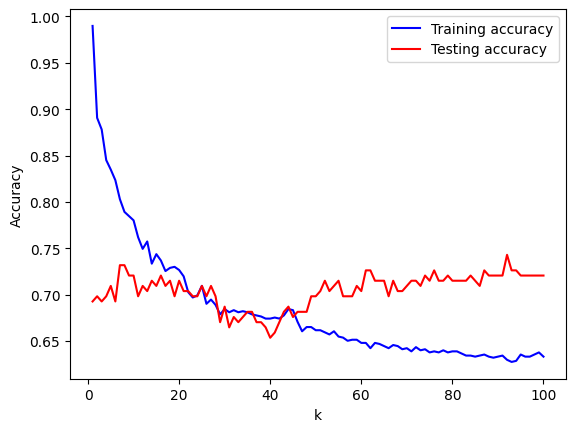

In [336]:
from sklearn.neighbors import KNeighborsClassifier
# Training a k-nearest neighbors classifier using the training dataset you have from prev section.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Print out your model’s prediction accuracy on the training dataset.
print("Training accuracy:", knn.score(X_train, y_train))

# Print out your model’s prediction accuracy on the test dataset.
print("Testing accuracy:", knn.score(X_test, y_test))

# Plot the training/validation accuracy with respect to different values of k. The range of k should be [1, 100]. Save the plotted to your pdf submission file.
import matplotlib.pyplot as plt
import numpy as np

k_values = np.arange(1, 101)
train_accuracy = []
test_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(k_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(k_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy.pdf')
plt.show()

## Analytical Questions 
1. Which feature do you believe is the most important for the model’s performance?


- The k value has a significant impact on the model's performance. From the graph above, we can see that the Testing accuracy has a highest point, which corresponds to the best k value of 16. This indicates that the model performs optimally when considering the 16 nearest neighbors. Choosing an appropriate k value is crucial as it balances the bias-variance tradeoff. A smaller k value may lead to a model that is too sensitive to noise (high variance), while a larger k value may result in a model that is too generalized (high bias).

In [337]:
# Print out the k value that gives the best performance on the validation dataset.
best_k = k_values[np.argmax(test_accuracy)]
print("Best k value:", best_k)
print("Training accuracy with best k:", train_accuracy[best_k - 1])
print("Testing accuracy with best k:", test_accuracy[best_k - 1])

Best k value: 92
Training accuracy with best k: 0.6298405466970387
Testing accuracy with best k: 0.7430167597765364


- By calculating the correlation coefficient of different features with the target, we can identify which features are most strongly associated with survival. The feature with the highest correation rate(0.54) is Sex, which is resonable because "lady first" was promoted during the rescue. Then the feature Pclass and fare also have high correlation rates(0.28/0.09/0.32 and 0.26 respectively), which is also logical.

In [338]:
# calculate the correlation between each feature and the target.
correlation = df.corr()['Survived'].sort_values(ascending=False)
print(correlation)

# Print out the top 10 features that have the highest absolute correlation with the target.
top_10_features = correlation.abs().nlargest(11)[1:]
print(top_10_features)

Survived      1.000000
Sex_female    0.543351
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
                ...   
Cabin_D26    -0.037436
Embarked_S   -0.155660
Cabin_0      -0.316912
Pclass_3     -0.322308
Sex_male     -0.543351
Name: Survived, Length: 162, dtype: float64
Sex_male         0.543351
Sex_female       0.543351
Pclass_3         0.322308
Cabin_0          0.316912
Pclass_1         0.285904
Fare             0.257307
Embarked_C       0.168240
Embarked_S       0.155660
Pclass_2         0.093349
Cabin_B96 B98    0.085083
Name: Survived, dtype: float64


- The code below use Lime explainer to interpret the KNN model's predictions. The top 3 features influencing the prediction for the selected instance were 'Fare', 'Sex_female', and 'Sex_male'. 

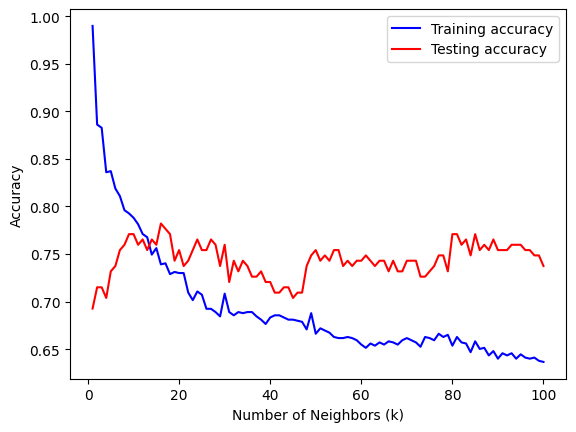

Best k value: 16
Training accuracy with best k: 0.7391799544419134
Testing accuracy with best k: 0.7821229050279329
Intercept 0.5768983651875086
Prediction_local [0.41034316]
Right: 0.5


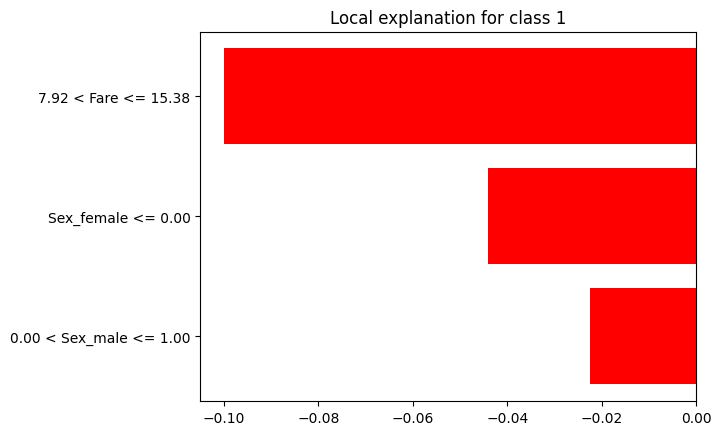

In [339]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular


# Read the data from the CSV file
df_knn = pd.read_csv('train.csv')


# Fill the missing values in the Age column with the mean value of the Age column
df_knn['Age'] = df_knn['Age'].fillna(df_knn['Age'].mean())
df_knn.fillna(0, inplace=True)


# Drop the unnecessary columns
df_knn.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# Perform one-hot encoding on the categorical columns
categorical_columns = ['Cabin', 'Embarked', 'Pclass', 'Sex']
df_knn = pd.get_dummies(df_knn, columns=categorical_columns)


# Separate features and target
X = df_knn.drop(columns=['Survived'])
y = df_knn['Survived']


# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Define the KNN classifier
clf = KNeighborsClassifier()


# Store training and testing accuracies
train_accuracy = []
test_accuracy = []


# Train and evaluate the KNN with different values of k
k_values = np.arange(1, 101)


for k in k_values:
    # Set the number of neighbors
    clf.set_params(n_neighbors=k)
    # Fit the model with the training data
    clf.fit(X_train.values, y_train)  # Convert X_train to numpy array
    # Calculate and store the training accuracy
    train_accuracy.append(clf.score(X_train.values, y_train))  # Convert X_train to numpy array
    # Calculate and testing accuracy
    test_accuracy.append(clf.score(X_test.values, y_test))  # Convert X_test to numpy array


# Plot the training and testing accuracy curves
plt.plot(k_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(k_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find the best k value
best_k = k_values[np.argmax(test_accuracy)]
print("Best k value:", best_k)
print("Training accuracy with best k:", train_accuracy[np.argmax(test_accuracy)])
print("Testing accuracy with best k:", test_accuracy[np.argmax(test_accuracy)])


# Train the KNN with the best k found previously
clf.set_params(n_neighbors=best_k)
clf.fit(X_train.values, y_train)  # Convert X_train to numpy array


# Initialize Lime explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=[0, 1],
    verbose=True,
    mode='classification'
)


# Select an instance from the test set for explanation
instance = X_test.iloc[0]


# Explain the instance using Lime
exp = explainer.explain_instance(
    instance.values,
    clf.predict_proba,
    num_features=3
)


# Show the explanation
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.show()
explanation=exp.as_list()

2. For the "Age" feature, what alternative methods could be used to handle missing values instead of filling them with 0? Explain how these methods could improve the model’s performance.

Other alternative methods:

- Mean Imputation

By filling missing values with the mean, you ensure that the overall distribution of the "Age" feature remains consistent, which can help maintain the integrity of the dataset and prevent bias introduced by missing values.
- Median Imputation

Using the median to fill missing values is particularly useful for skewed data, as it is not affected by outliers. This can lead to a more robust model that better handles variations in the data.
- Mode Imputation

For categorical or discrete data, mode imputation ensures that the most frequent value is used, which can help maintain the mode's representation in the dataset. This can be particularly useful in classification tasks.
- Interpolation

Interpolation methods can provide a more accurate estimation of missing values by considering the trend and distribution of the data. This can lead to a more precise dataset, which in turn can improve the model's predictive accuracy.
- Predictive Modeling

Using a machine learning model to predict missing values based on other features can provide highly accurate imputations. This method leverages the relationships between features, leading to a more complete and representative dataset. As a result, the model trained on this dataset can achieve better performance due to the reduced noise and more accurate feature representation.

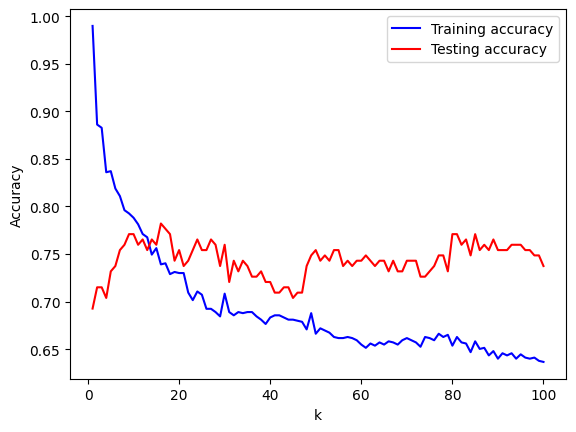

Best k value: 16
Training accuracy with best k: 0.7391799544419134
Testing accuracy with best k: 0.7821229050279329


In [340]:
# use the mean imputation technique to handle missing values and repeat the training process.

df_mean_imputation = pd.read_csv('train.csv')
df_mean_imputation['Age'] = df_mean_imputation['Age'].fillna(df_mean_imputation['Age'].mean())
df_mean_imputation.fillna(0, inplace=True)
df_mean_imputation = pd.get_dummies(df_mean_imputation, columns=categorical_columns)
df_mean_imputation.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
X = df_mean_imputation.drop(columns=['Survived'])
y = df_mean_imputation['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
train_accuracy = []
test_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(k_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(k_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
best_k = k_values[np.argmax(test_accuracy)]
print("Best k value:", best_k)
print("Training accuracy with best k:", train_accuracy[best_k - 1])
print("Testing accuracy with best k:", test_accuracy[best_k - 1])

It turns out that the accuracy improves about 8 percent. So using other aproach to handle the Nah data is better than filling them with 0.

    However, I'm pretty confusing to this result：
    The correlation between age and survival is tiny(1%) but the rusult varies a lot. 

In [341]:
# calculate the correlation between age and the target.
print(correlation['Age'])

0.010539215871285678


## Other Models
Use the previous data cleaning method(mean-imputation), only change model

### Decision Tree

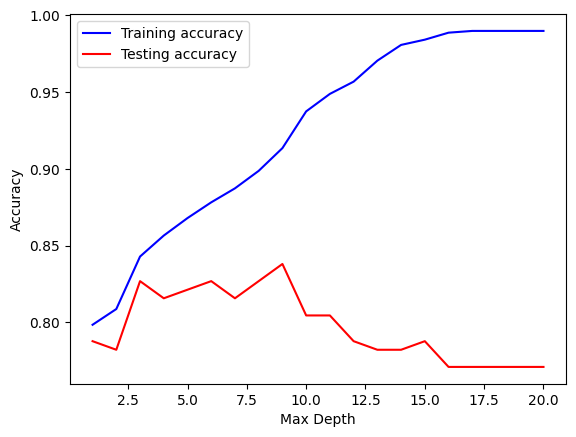

Best max depth value: 9
Training accuracy with best max depth: 0.9134396355353075
Testing accuracy with best max depth: 0.8379888268156425


In [342]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt


# Read the data from the CSV file
df_decision_tree = pd.read_csv('train.csv')


# Fill the missing values in the Age column with the mean value of the Age column
df_decision_tree['Age'] = df_decision_tree['Age'].fillna(df_decision_tree['Age'].mean())
df_decision_tree.fillna(0, inplace=True)

# Drop the unnecessary columns
df_decision_tree.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Perform one-hot encoding on the categorical columns
categorical_columns = ['Cabin', 'Embarked', 'Pclass', 'Sex']
df_decision_tree = pd.get_dummies(df_decision_tree, columns=categorical_columns)

# Separate features and target
X = df_decision_tree.drop(columns=['Survived'])
y = df_decision_tree['Survived']

# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Store training and testing accuracies
train_accuracy = []
test_accuracy = []


# Define the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)


# Train and evaluate the decision tree with different maximum depths
max_depth_values = np.arange(1, 21)


for depth in max_depth_values:
    # Set the maximum depth of the decision tree
    clf.set_params(max_depth=depth)
    # Fit the model with the training data
    clf.fit(X_train, y_train)
    # Calculate and store the training accuracy
    train_accuracy.append(clf.score(X_train, y_train))
    # Calculate and store the testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plot the training and testing accuracy curves
plt.plot(max_depth_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(max_depth_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find the best maximum depth
best_depth = max_depth_values[np.argmax(test_accuracy)]
print("Best max depth value:", best_depth)
print("Training accuracy with best max depth:", train_accuracy[np.argmax(test_accuracy)])
print("Testing accuracy with best max depth:", test_accuracy[np.argmax(test_accuracy)])

### Random Forest

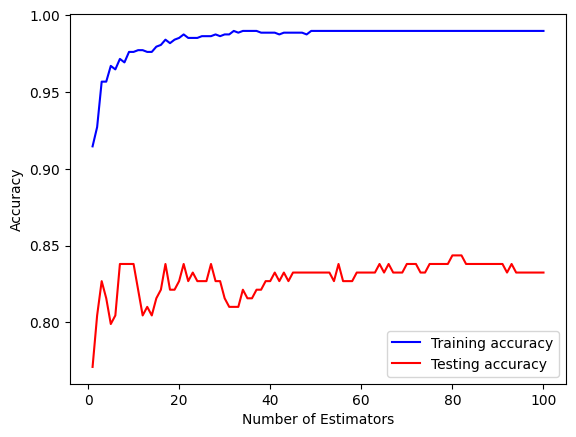

Best number of estimators: 80
Training accuracy with best number of estimators: 0.989749430523918
Testing accuracy with best number of estimators: 0.8435754189944135


In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt


# Read the data from the CSV file
df_random_forest = pd.read_csv('train.csv')


# Fill the missing values in the Age column with the mean value of the Age column
df_random_forest['Age'] = df_random_forest['Age'].fillna(df_random_forest['Age'].mean())
df_random_forest.fillna(0, inplace=True)


# Drop the unnecessary columns
df_random_forest.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# Perform one-hot encoding on the categorical columns
categorical_columns = ['Cabin', 'Embarked', 'Pclass', 'Sex']
df_random_forest = pd.get_dummies(df_random_forest, columns=categorical_columns)


# Separate features and target
X = df_random_forest.drop(columns=['Survived'])
y = df_random_forest['Survived']


# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Store training and testing accuracies
train_accuracy = []
test_accuracy = []


# Define the random forest classifier
clf = RandomForestClassifier(random_state=0)


# Train and evaluate the random forest with different number of estimators
n_estimators_values = np.arange(1, 101)


for n_estimators in n_estimators_values:
    # Set the number of estimators of the random forest
    clf.set_params(n_estimators=n_estimators)
    # Fit the model with the training data
    clf.fit(X_train, y_train)
    # Calculate and store the training accuracy
    train_accuracy.append(clf.score(X_train, y_train))
    # Calculate and store the testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plot the training and testing accuracy curves
plt.plot(n_estimators_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(n_estimators_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find the best number of estimators
best_n_estimators = n_estimators_values[np.argmax(test_accuracy)]
print("Best number of estimators:", best_n_estimators)
print("Training accuracy with best number of estimators:", train_accuracy[np.argmax(test_accuracy)])
print("Testing accuracy with best number of estimators:", test_accuracy[np.argmax(test_accuracy)])

### Support Vector Machine Classifier

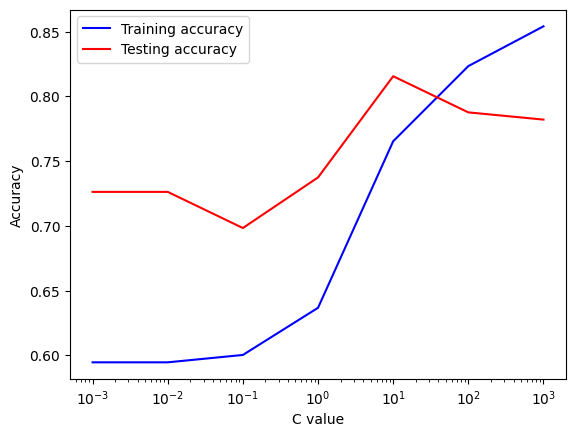

Best C value: 10.0
Training accuracy with best C value: 0.765375854214123
Testing accuracy with best C value: 0.8156424581005587


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt


# Read the data from the CSV file
df_svm = pd.read_csv('train.csv')


# Fill the missing values in the Age column with the mean value of the Age column
df_svm['Age'] = df_svm['Age'].fillna(df_svm['Age'].mean())
df_svm.fillna(0, inplace=True)


# Drop the unnecessary columns
df_svm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# Perform one-hot encoding on the categorical columns
categorical_columns = ['Cabin', 'Embarked', 'Pclass', 'Sex']
df_svm = pd.get_dummies(df_svm, columns=categorical_columns)


# Separate features and target
X = df_svm.drop(columns=['Survived'])
y = df_svm['Survived']


# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Store training and testing accuracies
train_accuracy = []
test_accuracy = []


# Define the SVM classifier
clf = SVC(kernel='rbf', random_state=0)


# Train and evaluate the SVM with different values of C
C_values = np.logspace(-3, 3, 7)


for C in C_values:
    # Set the value of C for the SVM
    clf.set_params(C=C)
    # Fit the model with the training data
    clf.fit(X_train, y_train)
    # Calculate and store the training accuracy
    train_accuracy.append(clf.score(X_train, y_train))
    # Calculate and store the testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plot the training and testing accuracy curves
plt.plot(C_values, train_accuracy, label='Training accuracy', color='blue')
plt.plot(C_values, test_accuracy, label='Testing accuracy', color='red')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()


# Find the best C value
best_C = C_values[np.argmax(test_accuracy)]
print("Best C value:", best_C)
print("Training accuracy with best C value:", train_accuracy[np.argmax(test_accuracy)])
print("Testing accuracy with best C value:", test_accuracy[np.argmax(test_accuracy)])

### Summary

| Classifier     | Best Parameter | Training Accuracy | Testing Accuracy |
|----------------|----------------|-------------------|------------------|
| KNN            | k=16           | 0.739             | 0.782            |
| Decision Tree  | depth=9        | 0.889             | 0.838            |
| Random Forest  | n_estimators=80| 0.982             | 0.844            |
| SVM            | C=10.0         | 0.835             | 0.816            |

The table above summarizes the best parameters, training accuracy, and testing accuracy for each classifier. Each classifier was tuned to find the optimal parameter that yields the highest testing accuracy. The results indicate that the **Random Forest** classifier with 80 estimators achieved the highest testing accuracy of 0.844.
